In [1]:
# importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading csv file
data = pd.read_csv('petrol.csv')

In [3]:
# sample of dataset
data.sample(10)

,city,date,rate,state
5036,Mumbai,2020-12-20,90.30,Maharashtra
4944,Mumbai,2020-09-19,87.87,Maharashtra
3773,Chennai,2020-05-05,75.52,Tamil Nadu
1690,Bengaluru,2020-04-11,73.53,Karnataka
2509,Delhi,2019-06-15,70.02,Delhi
3964,Chennai,2020-11-13,84.19,Tamil Nadu
1158,Bengaluru,2017-11-03,70.41,Karnataka
758,Hyderabad,2020-05-25,73.95,Telangana
1554,Bengaluru,2019-11-01,75.29,Karnataka
2756,Delhi,2020-05-19,71.30,Delhi


In [4]:
# shape of dataset
data.shape

(5048, 4)

In [5]:
# checking for null values in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048 entries, 0 to 5047
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    5048 non-null   object 
 1   date    5048 non-null   object 
 2   rate    5048 non-null   float64
 3   state   5048 non-null   object 
dtypes: float64(1), object(3)
memory usage: 157.9+ KB


In [6]:
# changing datatype of date to datetime datatype
data['date'] = pd.to_datetime(data['date'])

In [7]:
# changed datatype of date
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048 entries, 0 to 5047
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   city    5048 non-null   object        
 1   date    5048 non-null   datetime64[ns]
 2   rate    5048 non-null   float64       
 3   state   5048 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 157.9+ KB


In [8]:
# setting date as index
data = data.set_index('date')

In [9]:
# new preview of dataset
data.head()

,city,rate,state
date,,,
2011-12-01,Hyderabad,73.07,Telangana
2012-04-01,Hyderabad,73.08,Telangana
2012-05-24,Hyderabad,81.44,Telangana
2012-06-03,Hyderabad,78.11,Telangana
2012-06-29,Hyderabad,74.89,Telangana


In [10]:
# viewing index
data.index

DatetimeIndex(['2011-12-01', '2012-04-01', '2012-05-24', '2012-06-03',
               '2012-06-29', '2012-07-24', '2012-07-25', '2012-10-09',
               '2012-10-27', '2012-11-16',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=5048, freq=None)

In [11]:
# extracting year, month, day from index and creating new column
data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day

In [12]:
# sample of dataset after changes
data.sample(10)

,city,rate,state,year,month,day
date,,,,,,
2017-12-07,Bengaluru,70.30,Karnataka,2017,12,7
2018-01-02,Hyderabad,74.09,Telangana,2018,1,2
2017-09-29,Delhi,70.56,Delhi,2017,9,29
2019-04-22,Bengaluru,75.38,Karnataka,2019,4,22
2017-11-22,Chennai,72.01,Tamil Nadu,2017,11,22
2020-04-02,Mumbai,75.28,Maharashtra,2020,4,2
2020-08-14,Bengaluru,83.02,Karnataka,2020,8,14
2020-05-27,Bengaluru,73.53,Karnataka,2020,5,27
2018-12-07,Mumbai,76.55,Maharashtra,2018,12,7


In [13]:
# oldest data by year
data['year'].min()

2002

In [14]:
# latest data by year
data['year'].max()

2020

In [15]:
# as you can see the data is from 2002 to 2020
# checking for minimum price in dataset
mini = data['rate'].min()

In [16]:
# viewing the record of minimum value
data.loc[data['rate'] == mini]

,city,rate,state,year,month,day
date,,,,,,
2003-03-01,Delhi,23.1,Delhi,2003,3,1


In [17]:
# checking for minimum price in dataset
maxi = data['rate'].max()

In [18]:
# viewing the record of minimum value
data.loc[data['rate'] == maxi]

,city,rate,state,year,month,day
date,,,,,,
2018-10-04,Mumbai,91.39,Maharashtra,2018,10,4


In [19]:
# counting values by state
data['state'].value_counts()

Maharashtra    1035
Tamil Nadu     1031
Delhi          1029
Telangana       978
Karnataka       975
Name: state, dtype: int64

In [20]:
# counting values by city
data['city'].value_counts()

Mumbai       1035
Chennai      1031
Delhi        1029
Hyderabad     978
Bengaluru     975
Name: city, dtype: int64

In [21]:
# as we can see all states have only one city data so we will be using city instead of states

In [22]:
# extracting city wise data into new varibles for using in plots
mumbai = data[data['city'] == 'Mumbai']

In [23]:
# preview of citywise dataset
mumbai

,city,rate,state,year,month,day
date,,,,,,
2002-10-01,Mumbai,34.42,Maharashtra,2002,10,1
2002-10-17,Mumbai,34.95,Maharashtra,2002,10,17
2002-11-01,Mumbai,34.98,Maharashtra,2002,11,1
2002-11-16,Mumbai,34.23,Maharashtra,2002,11,16
2002-12-01,Mumbai,33.63,Maharashtra,2002,12,1
...,...,...,...,...,...,...
2020-12-27,Mumbai,90.30,Maharashtra,2020,12,27
2020-12-28,Mumbai,90.30,Maharashtra,2020,12,28
2020-12-29,Mumbai,90.30,Maharashtra,2020,12,29


In [24]:
# extracting city wise data into new varibles for using in plots
delhi = data[data['city'] == 'Delhi']

In [25]:
# checking for duplicate dates
delhi.index.value_counts()

2018-01-08    2
2020-01-09    1
2020-01-11    1
2020-01-12    1
2020-01-13    1
             ..
2018-05-29    1
2018-05-31    1
2018-06-01    1
2018-06-02    1
2020-12-31    1
Name: date, Length: 1028, dtype: int64

In [26]:
# duplicate dates
delhi.loc[delhi.index == '2018-01-08']

,city,rate,state,year,month,day
date,,,,,,
2018-01-08,Delhi,77.18,Delhi,2018,1,8
2018-01-08,Delhi,70.50,Delhi,2018,1,8


In [27]:
# # removing records of duplicate dates
delhi = delhi.drop(['2018-01-08'], axis = 0)

In [28]:
delhi.index.value_counts()

2002-11-01    1
2020-04-17    1
2020-01-10    1
2020-01-11    1
2020-01-12    1
             ..
2018-05-29    1
2018-05-31    1
2018-06-01    1
2018-06-02    1
2020-12-31    1
Name: date, Length: 1027, dtype: int64

In [29]:
chennai = data[data['city'] == 'Chennai']

In [30]:
chennai.index.value_counts()

2015-07-01    2
2019-11-01    2
2012-06-03    2
2020-01-18    1
2020-01-23    1
             ..
2018-06-02    1
2018-06-03    1
2018-06-04    1
2018-06-05    1
2020-12-31    1
Name: date, Length: 1028, dtype: int64

In [31]:
chennai = chennai.drop(['2015-07-01','2019-11-01','2012-06-03'], axis = 0)

In [32]:
chennai.index.value_counts()

2002-11-01    1
2019-04-12    1
2020-01-11    1
2020-01-12    1
2020-01-13    1
             ..
2018-06-02    1
2018-06-03    1
2018-06-04    1
2018-06-05    1
2020-12-31    1
Name: date, Length: 1025, dtype: int64

In [33]:
hydera = data[data['city'] == 'Hyderabad']

In [34]:
hydera.index.value_counts()

2011-12-01    1
2020-01-26    1
2020-01-28    1
2020-01-29    1
2020-01-30    1
             ..
2018-07-30    1
2018-07-31    1
2018-08-02    1
2018-08-03    1
2020-12-31    1
Name: date, Length: 978, dtype: int64

In [35]:
bengal = data[data['city'] == 'Bengaluru']

In [36]:
bengal

,city,rate,state,year,month,day
date,,,,,,
2012-04-01,Bengaluru,73.51,Karnataka,2012,4,1
2012-05-24,Bengaluru,81.75,Karnataka,2012,5,24
2012-06-03,Bengaluru,79.61,Karnataka,2012,6,3
2012-06-29,Bengaluru,76.39,Karnataka,2012,6,29
2012-07-24,Bengaluru,77.30,Karnataka,2012,7,24
...,...,...,...,...,...,...
2020-12-27,Bengaluru,86.47,Karnataka,2020,12,27
2020-12-28,Bengaluru,86.47,Karnataka,2020,12,28
2020-12-29,Bengaluru,86.47,Karnataka,2020,12,29


In [37]:
bengal.index.value_counts()

2012-04-01    1
2020-02-29    1
2020-01-29    1
2020-01-30    1
2020-01-31    1
             ..
2018-08-03    1
2018-08-06    1
2018-08-07    1
2018-08-13    1
2020-12-31    1
Name: date, Length: 975, dtype: int64

now we have created variable for every city

# Line Plot

In [54]:
# creating a fuction for visualizing Line Plot
def linePlot(city,ran):
#   using seaborn module for line plot 
    plt.subplot(5,1,ran)
    sns.lineplot(x = 'date', y = 'rate', data = city, color = 'r')
    plt.subplots_adjust(wspace= 0.4)
    
#   extracting city name from dataset and changing it into a string
    placeName = city['city'].unique()
    placeName = np.array_str(placeName)
    placeName = placeName[2:-2]
    
#   title and labels for Plots
    title = 'Petrol Price in {place}'.format(place = placeName)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Price')


In [55]:
# creating a list for all citywise datasets
cities = [mumbai,delhi,chennai,hydera,bengal]
rang = [1,2,3,4,5,6]

In [60]:
# creating a function for visulaizing all cities Line PLots
def allInOne():
    fig, axs = plt.subplots(nrows = 1, ncols = 5, figsize=(10,10))
    plt.subplots_adjust(hspace = 1.4)
    for city,ran in zip(cities,rang):
        linePlot(city,ran)

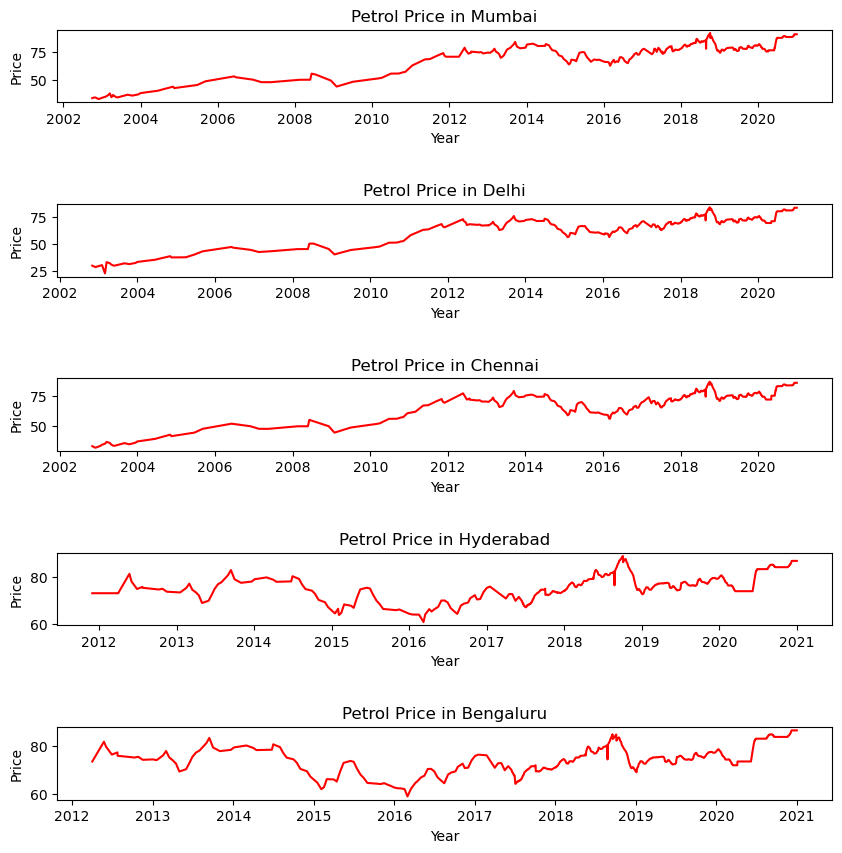

In [59]:
allInOne()

# Bar Plot in Years

In [42]:
# creating a fuction to visualize data by year 
def barPlot(yearData, numb):
    plt.subplot(1,3,numb)
    sns.barplot(x = 'city', y = 'rate', data = yearData)
    plt.title(str(yearData['year'].unique()))
    plt.xlabel('Cities')
    plt.ylabel('Price in Rupees')

# creating a function to subplot data by years
def yearPlot(startyear):
    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(15,4))
    plt.subplots_adjust(hspace = 0.5)
    fig.suptitle('Petrol Prices by Years', fontsize = 18, y = 1.05)
    for i in range(1,4):
        rates = data[data['year'] == startyear + i]
        barPlot(rates,i)


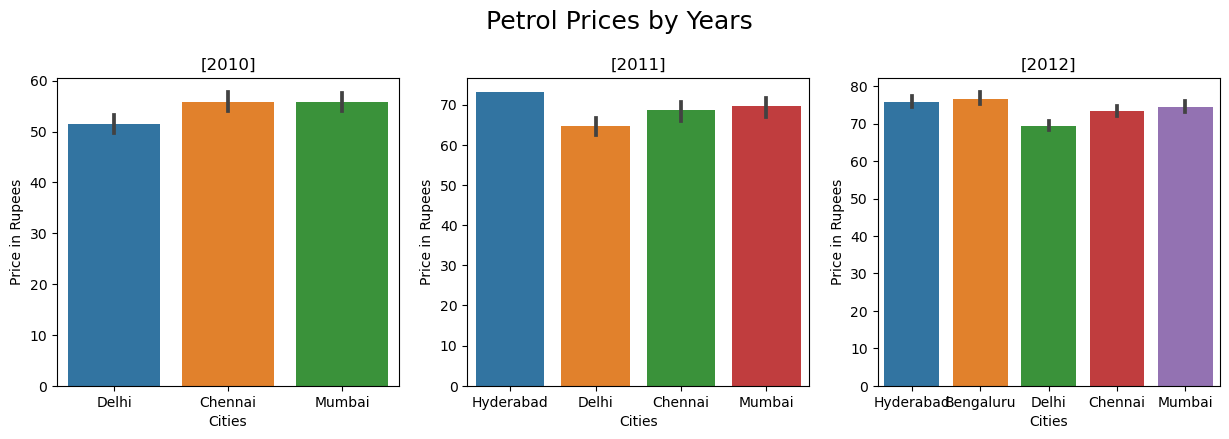

In [43]:
yearPlot(2009)

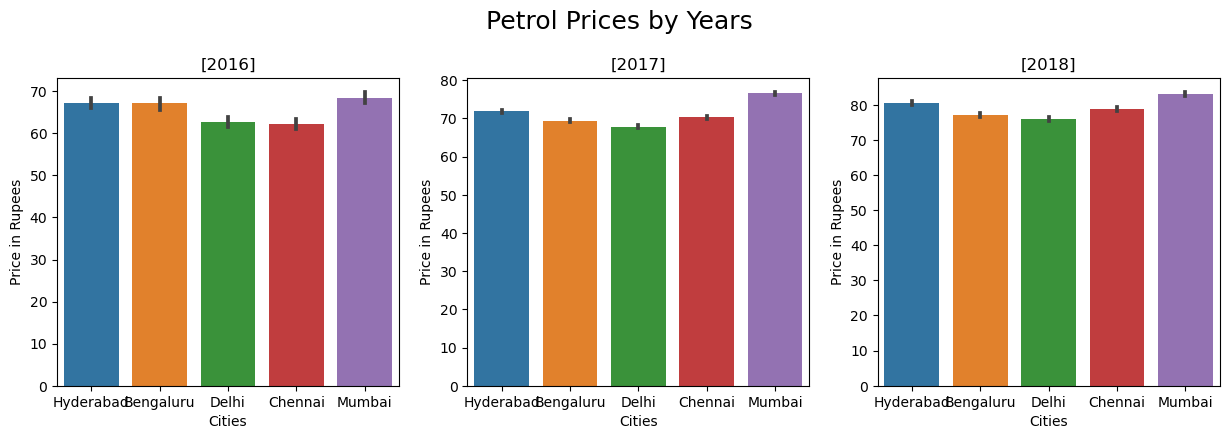

In [44]:
yearPlot(2015)

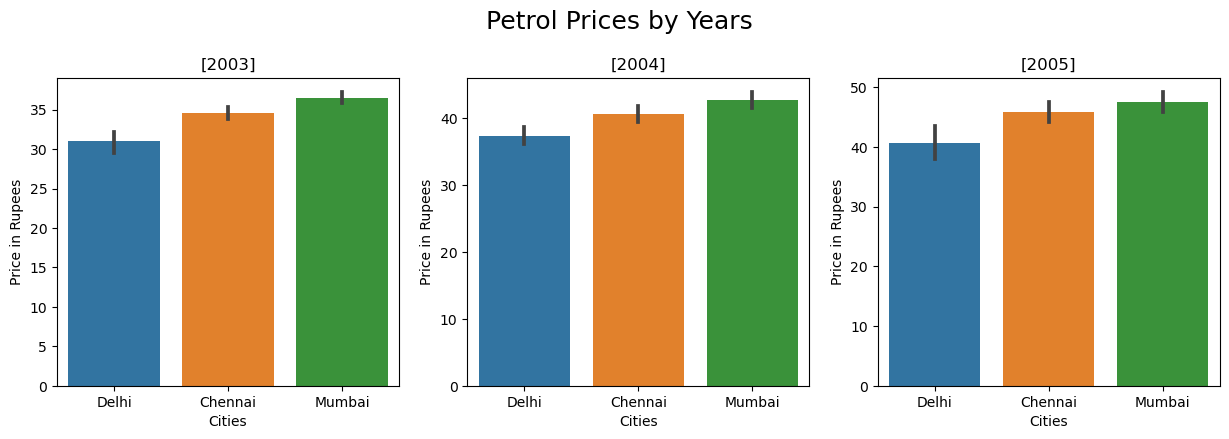

In [45]:
yearPlot(2002)

# Joint Plot

In [46]:
# creating a function to visualize joint function
def joinPlot(city):
    sns.jointplot( x = 'year', y = 'rate', data = city, kind = 'reg')
    plt.show()

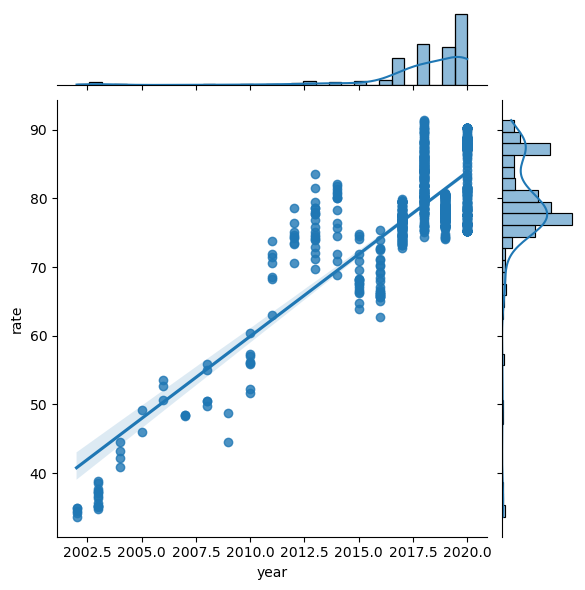

In [47]:
joinPlot(mumbai)